# Graphiques Variables Officielles

## Import des packages et des données

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

%matplotlib inline

In [25]:
retail_trade = pd.read_csv('Ressources/Retail trade index.csv',sep=';').drop(range(4)).reset_index().drop('index',axis=1)
retail_trade = retail_trade.rename({'Titre :':'Date'},axis='columns').set_index('Date').replace({',':'.'},regex=True).astype('float64')

In [26]:
retail_brut = retail_trade.loc[:,[column.endswith('(Brut)') for column in retail_trade.columns]]
retail_CJO_CVS = retail_trade.loc[:,[column.endswith('(Brut)') for column in retail_trade.columns]]

In [27]:
retail_brut_valeur = retail_brut.filter(regex='indice en valeur')
retail_brut_volume = retail_brut.filter(regex='indice en volume')
retail_CJO_CVS_valeur = retail_CJO_CVS.filter(regex='indice en valeur')
retail_CJO_CVS_volume = retail_CJO_CVS.filter(regex='indice en volume')

## Graphiques simples

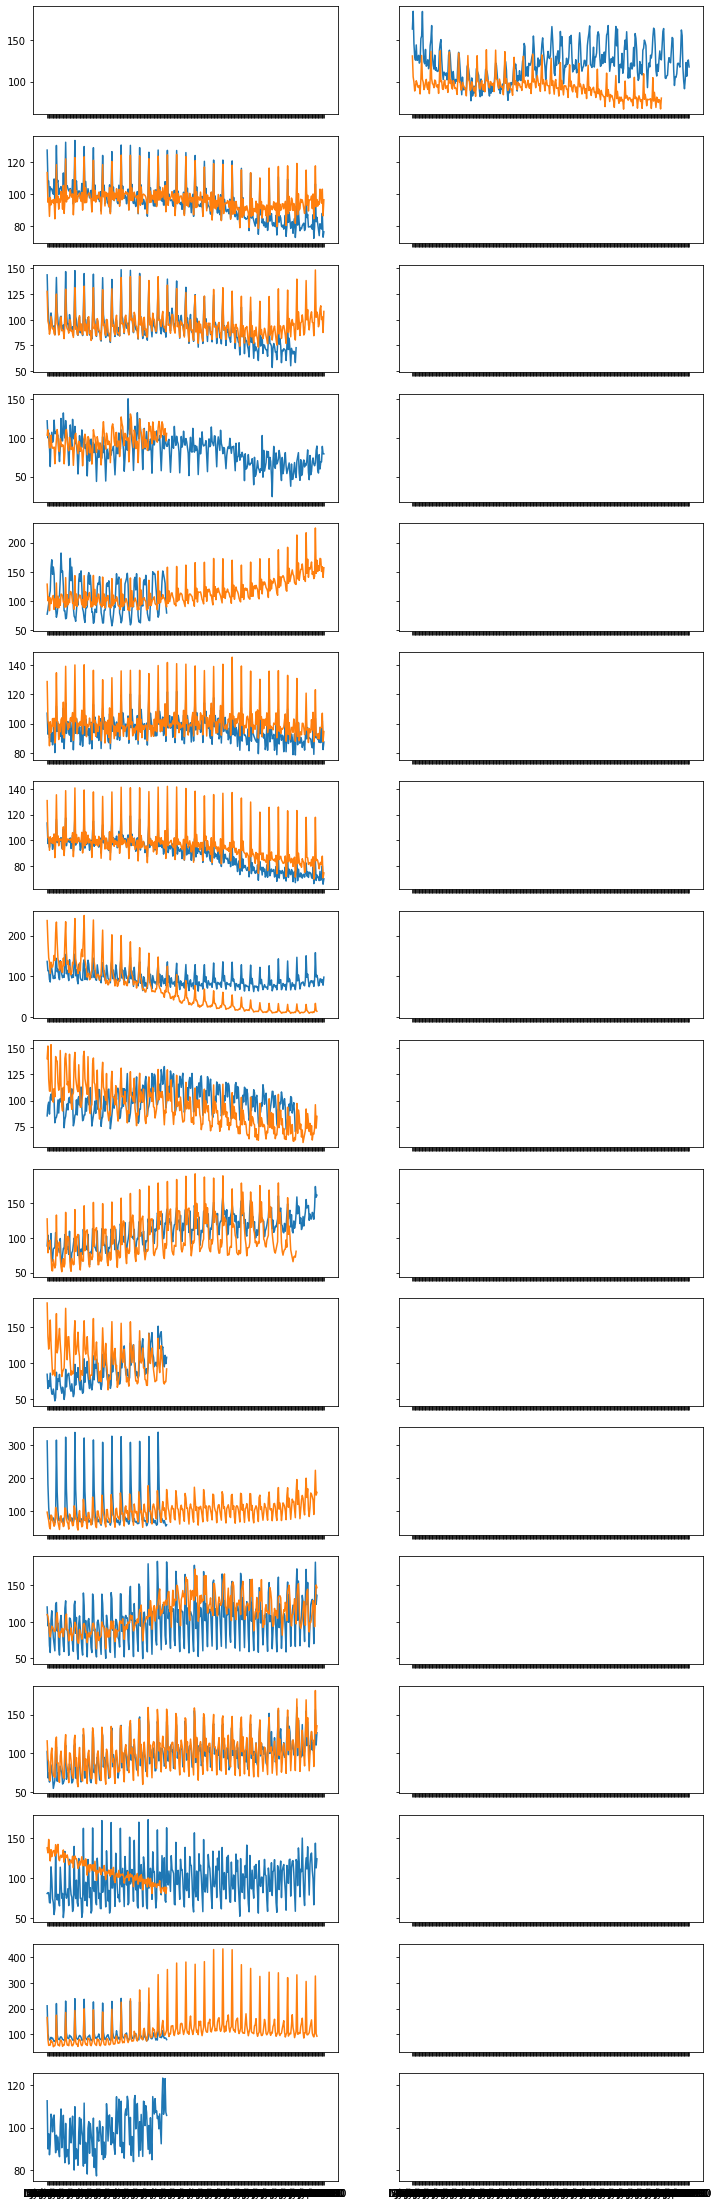

In [45]:
plt.rcParams['figure.figsize'] = [12,40]
longueur = len(retail_brut_volume.columns)//2 + 1
fig_retail_brut_volume, axs_volume = plt.subplots(longueur,2,sharex='col',sharey='row',gridspec_kw={'wspace':0.2,'hspace':0.2})

for col in retail_brut_volume.columns:
    row = list(retail_brut_volume.columns).index(col)//2
    colu = (list(retail_brut_volume.columns).index(col)//2==0)*1
    axs_volume[row][colu].plot(retail_brut_volume.iloc[:,list(retail_brut_volume.columns).index(col)])